In [7]:
import numpy as np
from scipy import sparse 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
import networkx as nx
import random
import pandas as pd
from datetime import date, timedelta
from collections import Counter
import time
from tqdm import tqdm
import pickle
random.seed(42)

In [11]:
with open("../data/graph/edges.M.pkl", "rb") as f:
    edge_holder = pickle.load(f)

In [12]:

edges = edge_holder["edges"]
edges, len(edges)

(array([[101827, 137379,  15006],
        [101288, 137379,  15006],
        [101288, 101827,  15006],
        ...,
        [134047,  97398,  19119],
        [134047,  94487,  19119],
        [134047,  69753,  19119]]),
 14082862)

In [13]:
degree_count = {}

for v1, v2, _ in edges:
    degree_count[v1] = degree_count.get(v1, 0) + 1
    degree_count[v2] = degree_count.get(v2, 0) + 1

# Analysis

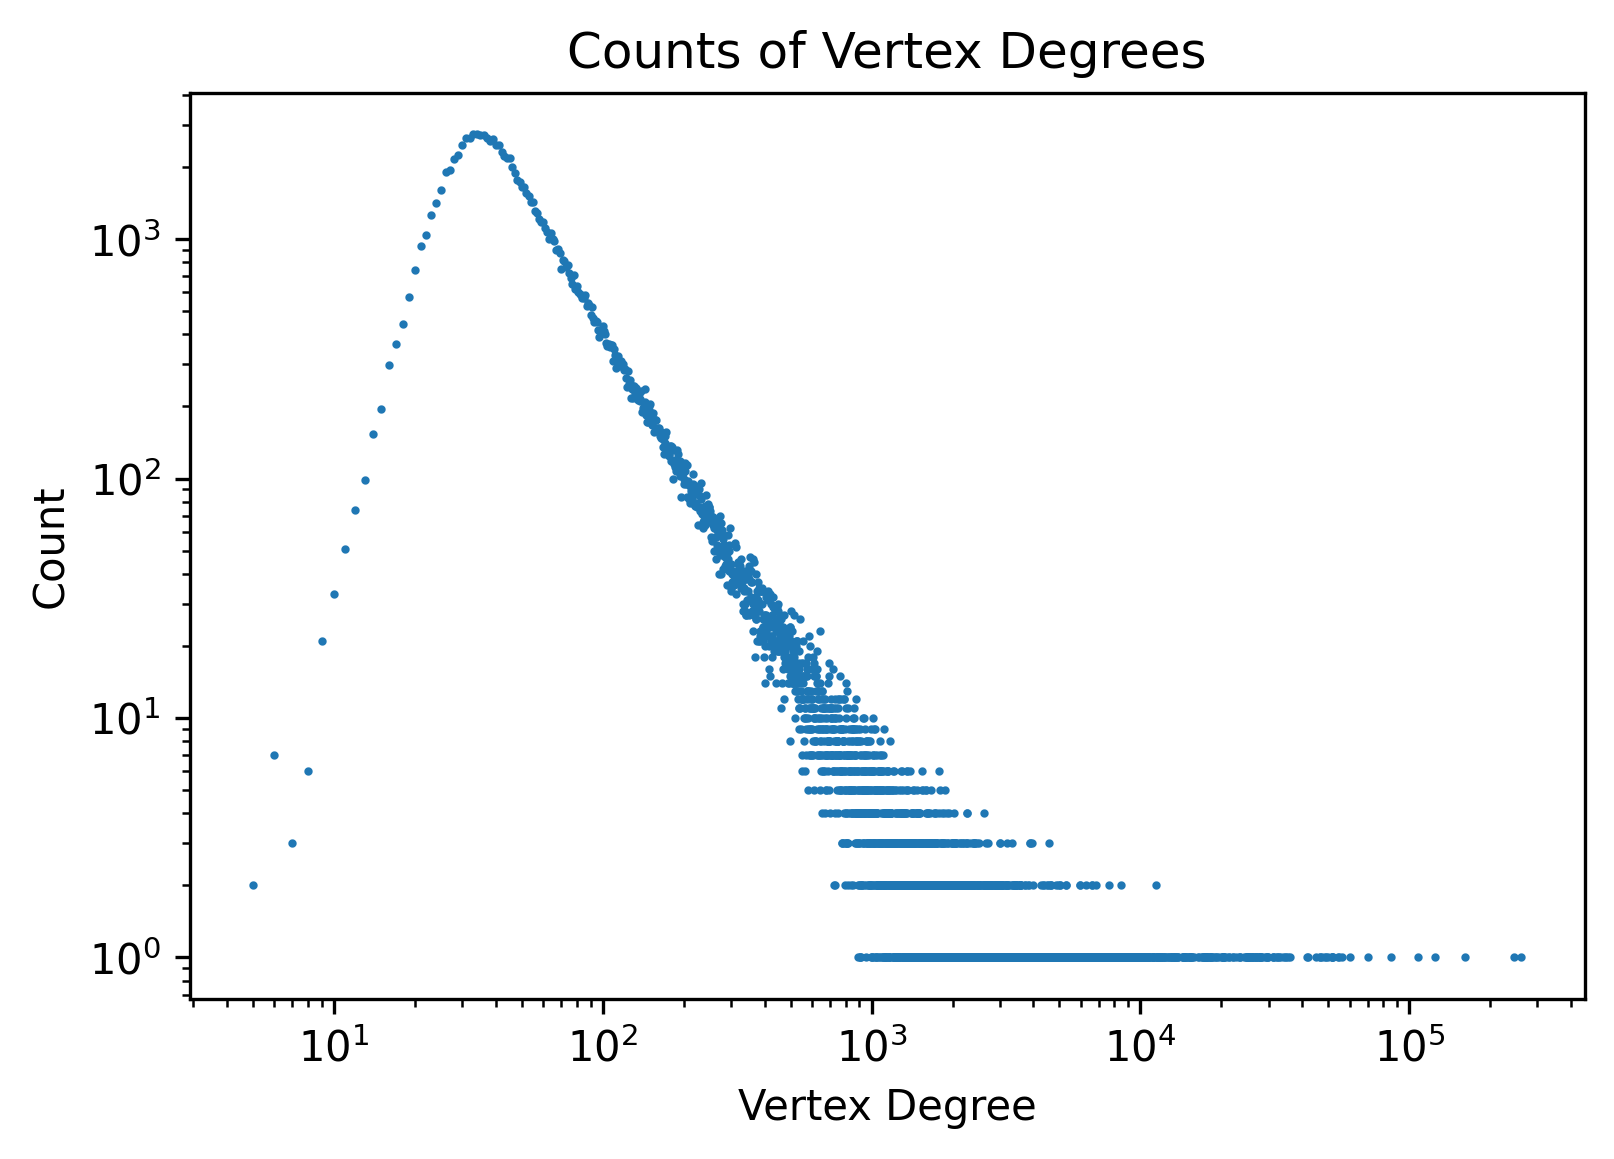

In [14]:
data = Counter(degree_count.values())

x, y = zip(*data.items())
fig, ax = plt.subplots()
ax.scatter(x, y, s=1)
plt.xscale("log")
plt.yscale("log")
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.show()

In [15]:
origin = date(1970, 1, 1)
years = [(origin + timedelta(days=int(days))).year for _, _, days in edges]

In [17]:
def build_adj_matrix(edge_list):
    """Build a symmetric adjacency matrix from edge list."""
    EDGE_WEIGHT = np.ones(len(edge_list) * 2)  # each connection weights the same

    row_ind = np.concatenate((edge_list[:, 0], edge_list[:, 1]))
    col_ind = np.concatenate((edge_list[:, 1], edge_list[:, 0]))

    return sparse.csr_matrix(
        (
            EDGE_WEIGHT,
            (row_ind, col_ind),
        ),
        dtype=int
    )

ADJ_MAT = build_adj_matrix(edges)

G = nx.from_scipy_sparse_array(
    ADJ_MAT,
    parallel_edges=False,
)

# Concepts

Filter: 
- Occurence >= 3
- Words >= 3

Element-specific:
- No single elements (i.e. Na)
- No duplicates (i.e. IIINV, CH3COONa, Ga2O3Gd2O3)

In [19]:
lookup = pd.read_csv("../data/table/lookup/lookup.M.csv")

def transform(vs):
    return [lookup.loc[index]["concept"] for index in vs]

pd.set_option('display.max_columns', None) # no ... in listing
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
lookup.sort_values('count', ascending=False)[["concept", "count"]].head(250)

,concept,count
82719,mechanical property,20815
146577,x-ray diffraction,20011
116479,scanning electron microscopy,11993
138613,transmission electron microscopy,9394
45030,electron microscopy,8177
133322,tensile strength,7135
5485,SiC,6402
58584,grain size,4960
103804,plastic deformation,4708
60906,heat treatment,4625


# Vertices

In [20]:
sorted_pairs = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)
sorted_pairs[:10]
[(transform([vertex])[0],count) for vertex,count in sorted_pairs]

[('x-ray diffraction', 261246),
 ('mechanical property', 245993),
 ('scanning electron microscopy', 161477),
 ('transmission electron microscopy', 124404),
 ('electron microscopy', 107885),
 ('tensile strength', 85241),
 ('SiC', 70366),
 ('grain size', 60228),
 ('plastic deformation', 56131),
 ('tensile test', 54639),
 ('heat treatment', 54215),
 ('stainless steel', 52063),
 ('scanning electron microscope', 51755),
 ('TiO2', 51747),
 ('yield strength', 51716),
 ('optical property', 49907),
 ('Al2O3', 48955),
 ('structural property', 48757),
 ('strain rate', 47194),
 ('grain boundary', 46558),
 ('ZnO', 46540),
 ('SiO2', 44979),
 ('electrical property', 42146),
 ('x-ray photoelectron spectroscopy', 41743),
 ('corrosion resistance', 36153),
 ('microstructure evolution', 35388),
 ('thermal stability', 34955),
 ('tensile property', 34592),
 ('electron microscope', 33821),
 ('optical microscopy', 33187),
 ('compressive strength', 32698),
 ('photoelectron spectroscopy', 32206),
 ('fracture to

# Communities

In [ ]:
partition = nx.community.louvain_communities(G, resolution=15, threshold=1e-7)
densly_connected = [vs for vs in partition if len(vs) > 1]

print("Amount Communities", len(densly_connected))
[transform(vs) for vs in densly_connected]

# Highly Connected Vertex Pairs

In [ ]:
edge_counts = Counter(list(G.edges()))
filtered_edges = {tuple(transform(edge)):count for edge, count in edge_counts.most_common() if count > 10}
filtered_edges

In [ ]:
DAY_ORIGIN = date(1970, 1, 1)

def get_until(graph, day):
    return graph[graph[:, 2] < (day - DAY_ORIGIN).days]

years = [date(x, 12, 31) for x in range(1990, 2024)]


ccs = []
for year in tqdm(years):
    G = nx.from_scipy_sparse_array(
        build_adj_matrix(
            get_until(edges, year)
        ),
        parallel_edges=True,
        create_using=nx.MultiGraph
    )
        
    ccs.append(
       [c for c in nx.connected_components(G) if len(c) > 1]
    )



# Connected Components

In [ ]:
fig, ax1 = plt.subplots()
y1 = [len(c) for c in ccs]
y2 = [max({len(sub_c) for sub_c in c}) for c in ccs]

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('# Connected Components', color=color)
ax1.plot(years, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Size of the largest CC', color=color)
ax2.plot(years, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()